In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
import matplotlib.pyplot as plt

In [98]:
# Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [99]:
df.shape

(20640, 9)

In [100]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [101]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [102]:
df.drop(['Latitude','Longitude'], axis=1,inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   MedHouseVal  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [104]:
# Remove outliers in numerical columns using Z-score 
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [105]:
X = df.drop('MedHouseVal',axis=1)
y = df['MedHouseVal']

In [106]:
# Rescale numerical columns
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [107]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [120]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,100,5)
train_mape_scores = []
test_mape_scores = []

In [121]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [122]:
test_mape_scores

[0.5743235296206544,
 0.5304760747260298,
 0.5391369637598984,
 0.5510733937349422,
 0.5630249449730396,
 0.5698996759032572,
 0.5751372878760197,
 0.5785916180993467,
 0.5831691572705235,
 0.5867611251801685,
 0.5911360760754886,
 0.5940991800001354,
 0.5959801310781606,
 0.5971567058463185,
 0.5982268829700245,
 0.5999750693438242,
 0.601255798828151,
 0.6016755443839947,
 0.6020466225383477,
 0.6026090343845213]

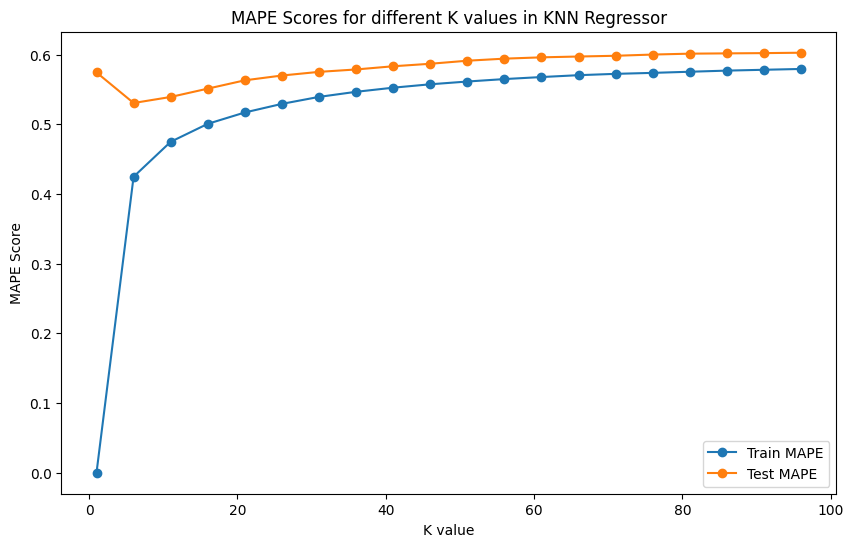

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()